In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('telemonitoring_parkinsons_updrs.data.csv')

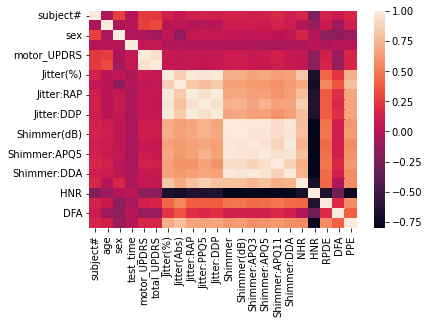

In [3]:
sns.heatmap(dataset.corr(), annot=False)

In [4]:
dataset = dataset.drop('subject#', axis=1) # Remove Subject Num
dataset = dataset.drop('motor_UPDRS', axis=1) # Remove Motor_UPDRS
dataset = dataset.drop("Jitter(%)", axis=1) # Remove Jitter(%)

In [5]:
y=dataset['total_UPDRS']
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [6]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
print(y_train)

598     40.840
4511    28.322
5284    39.408
1431    19.000
3582    28.155
         ...  
4931    31.818
3264    17.581
1653    23.122
2607    26.002
2732    16.559
Name: total_UPDRS, Length: 4700, dtype: float64


In [8]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [9]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)

In [10]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for CART R Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for CART R Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for CART R Model:  1.0
Testing Accuracy for CART R Model:  0.9052915522130248
RMSE for Training Data:  1.2523938914828194e-15
RMSE for Testing Data:  3.249091613522744


In [11]:
predicted_value=y_pred_test
true_value=y_test

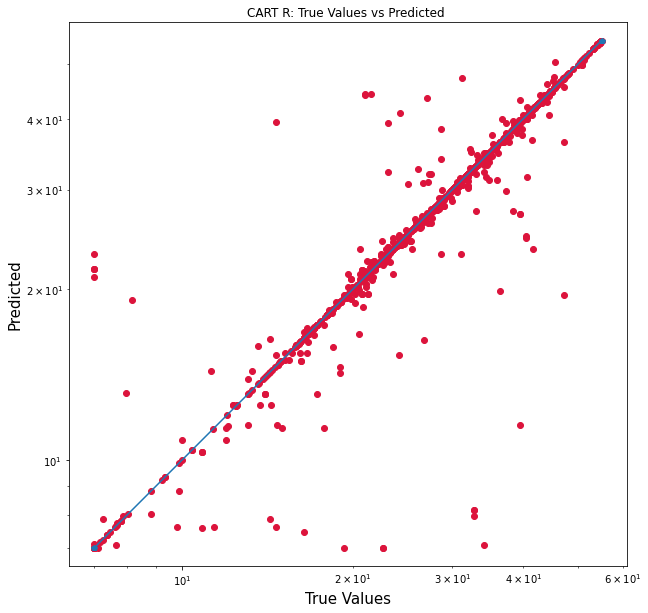

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'p-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("CART R: True Values vs Predicted ")
plt.axis('equal')
plt.show()